Nama : Galih Aji Syafaat

NIM  : 24060121130072

Nama Dataset : winequality


                    *   winequality-red.csv
                    *   winequality-white.csv
Link Dataset Asli : https://archive.ics.uci.edu/dataset/186/wine+quality

Link Dataset Yang dipakai : https://drive.google.com/drive/folders/1KtECM62OZ1VHNqkPvK2Gmb1uhMKYNHM2




In [ ]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np

model_selection: Modul ini menyediakan fungsi untuk membagi dataset menjadi set pelatihan dan pengujian, validasi silang, dan teknik pemilihan model lainnya.


---


accuracy_score: Fungsi ini menghitung akurasi dari model klasifikasi.
confusion_matrix: Fungsi ini menghitung matriks konfusi untuk mengevaluasi kinerja algoritma klasifikasi.


---


classification_report: Fungsi ini menghasilkan laporan teks yang menunjukkan metrik klasifikasi utama seperti presisi, recall, dan F1-score.


---


GaussianNB: Klasifikasi Gaussian Naive Bayes untuk tugas klasifikasi.


---


metrics: Submodul di scikit-learn yang berisi berbagai metrik untuk mengevaluasi kinerja model.


---


SVC: Support Vector Classification, jenis klasifikasi Support Vector Machine (SVM).


---


KNeighborsClassifier: Klasifikasi K-Nearest Neighbors.


---


RandomForestClassifier: Klasifikasi Random Forest.


---


DecisionTreeClassifier: Klasifikasi Decision Tree.


---


SGDClassifier: Klasifikasi Stochastic Gradient Descent.


---


pandas as pd: Library untuk manipulasi data, umumnya digunakan untuk bekerja dengan data tabular.


---


numpy as np: Library untuk operasi numerik dan bekerja dengan array.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pada baris pertama (from google.colab import drive), kode mengimpor modul drive dari pustaka google.colab. Modul ini menyediakan fungsi untuk menghubungkan Google Colab dengan Google Drive.

In [ ]:
names = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
dataset_red = pd.read_csv('/content/drive/MyDrive/ML/MLA1/winequality-red.csv', delimiter=';', names=names,header=0)

Kode di atas membaca dua file CSV yang berisi data kualitas anggur, memuatnya ke dalam dua dataset terpisah: dataset_red untuk anggur merah dan dataset_white untuk anggur putih.

Pada baris pertama, digunakan untuk daftar nama kolom yang akan digunakan untuk dataset. Nama-nama ini akan digunakan sebagai header atau label kolom untuk setiap dataset yang akan dibaca.

In [ ]:
array = dataset_red.values
X = array[:,0:11]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Mengubah Dataset ke dalam Array:

array = dataset_red.values

Membuat array dari dataset yang telah dibaca. Setiap baris dalam array ini akan mewakili entri dari dataset, dan setiap kolom akan mewakili fitur atau label.


---
Pemisahan Fitur dan Label:

Memisahkan fitur (X) dan label (Y) dari array. X akan berisi kolom 0 hingga 10 (indeks 0-10), sedangkan Y akan berisi kolom ke-11 (indeks 11).
---
Pembagian Data menjadi Data Pelatihan dan Data Validasi:

validation_size = 0.20

seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

Menggunakan train_test_split dari modul model_selection untuk membagi dataset menjadi data pelatihan (X_train, Y_train) dan data validasi (X_validation, Y_validation). Persentase data validasi diatur sebesar 20%, dan random_state digunakan untuk memastikan hasil pembagian data dapat direproduksi dengan seed yang sama.

---


In [ ]:
X_train

array([[12.5  ,  0.46 ,  0.63 , ...,  2.99 ,  0.87 , 10.2  ],
       [ 8.   ,  0.81 ,  0.25 , ...,  3.19 ,  0.42 ,  9.2  ],
       [ 6.9  ,  0.765,  0.02 , ...,  3.57 ,  0.78 ,  9.9  ],
       ...,
       [ 8.1  ,  0.825,  0.24 , ...,  3.37 ,  0.77 , 10.7  ],
       [10.9  ,  0.32 ,  0.52 , ...,  3.28 ,  0.77 , 11.5  ],
       [ 6.9  ,  0.5  ,  0.04 , ...,  3.35 ,  0.78 ,  9.5  ]])

In [ ]:
Y_train

array([5., 5., 5., ..., 6., 6., 5.])

In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'




---




*   Variabel seed digunakan untuk menetapkan nilai seed dalam proses pembagian data atau validasi silang. Menetapkan seed memastikan bahwa hasil yang diperoleh dapat direproduksi jika menggunakan seed yang sama.


---


*   Variabel scoring menentukan metrik evaluasi yang akan digunakan selama proses pelatihan dan evaluasi model. Dalam hal ini, metriknya adalah akurasi (accuracy). Akurasi mengukur sejauh mana model dapat membuat prediksi yang benar dibandingkan dengan total jumlah prediksi.




---




In [ ]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)

  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.499656 (0.040829)
NB: 0.541831 (0.035975)
SVM: 0.499606 (0.051481)




1.   Inisialisasi Model:

      *   Membuat list models yang berisi beberapa algoritma klasifikasi, seperti K-Nearest Neighbors (KNN), Gaussian Naive Bayes (NB), dan Support Vector Machine (SVM).
      *  Setiap algoritma diinisialisasi sebagai objek kelasifikasi yang siap digunakan.


2.  Evaluasi Model:

      *   Looping melalui setiap model dalam list models.
      *   Menggunakan validasi silang (cross-validation) dengan KFold untuk menghitung performa model.
      *   Metrik evaluasi yang digunakan diatur sebelumnya sebagai scoring (dalam hal ini, akurasi).
      *  Hasil evaluasi, yaitu akurasi dari setiap lipatan validasi, dicatat dan dicetak untuk setiap model.


3.   Output:

        *   Hasil akhirnya adalah cetakan yang menunjukkan nama model, rata-rata akurasi dari validasi silang, dan deviasi standar akurasi dari validasi silang.






In [ ]:
print(dataset_red.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print("Accuracy:", accuracy_score(Y_validation, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_validation, predictions))
print("Classification Report:\n", classification_report(Y_validation, predictions, zero_division=1))


Accuracy: 0.521875
Confusion Matrix:
 [[  0   2   8   0   0]
 [  0  59  64   0   0]
 [  0  38 108   0   0]
 [  0   2  35   0   0]
 [  0   0   4   0   0]]
Classification Report:
               precision    recall  f1-score   support

         4.0       1.00      0.00      0.00        10
         5.0       0.58      0.48      0.53       123
         6.0       0.49      0.74      0.59       146
         7.0       1.00      0.00      0.00        37
         8.0       1.00      0.00      0.00         4

    accuracy                           0.52       320
   macro avg       0.82      0.24      0.22       320
weighted avg       0.61      0.52      0.47       320





1.   Pelatihan Model dan Prediksi:



>   Membuat objek SVC() sebagai model Support Vector Machine.
  Melatih model menggunakan data pelatihan (X_train, Y_train) dengan menggunakan metode fit.
  Membuat prediksi pada dataset validasi (X_validation), dan hasilnya disimpan dalam variabel predictions.


2.   Evaluasi dan Cetak Hasil

> *   Mencetak hasil evaluasi performa model pada dataset validasi.
*   accuracy_score digunakan untuk menghitung akurasi prediksi.
*   classification_report memberikan laporan yang lebih rinci termasuk presisi, recall, dan F1-score untuk setiap kelas.
*   confusion_matrix memberikan matriks konfusi yang menunjukkan seberapa baik model dapat memprediksi setiap kelas.
*   Parameter zero_division=1 digunakan untuk menghindari peringatan jika ada pembagian nol dalam perhitungan metrik tersebut.








In [ ]:
cm = confusion_matrix (Y_validation, predictions)

1. Penghitungan Matriks Konfusi:



> * Fungsi confusion_matrix digunakan untuk menghitung matriks konfusi.
* Parameter pertama (Y_validation) adalah nilai sebenarnya dari dataset validasi.
* Parameter kedua (predictions) adalah hasil prediksi yang dihasilkan oleh model.



2. Variabel cm:



> * Variabel cm akan berisi hasil dari matriks konfusi yang dihasilkan oleh fungsi tersebut.
* Matriks konfusi adalah array dua dimensi di mana setiap elemen [i, j]
 mewakili jumlah sampel yang sebenarnya berada dalam kelas ke-i dan diprediksi masuk ke kelas ke-j.



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["4.0", "5.0", "6.0", "7.0", "8.0"])

Confusion Matrix Display:


> * Membuat objek ConfusionMatrixDisplay untuk menampilkan matriks konfusi.
* confusion_matrix=cm menyediakan matriks konfusi yang akan ditampilkan.
* display_labels menyediakan label kelas yang akan ditampilkan pada matriks konfusi. Dalam hal ini, label kelas adalah "4.0", "5.0", "6.0", "7.0", "8.0".




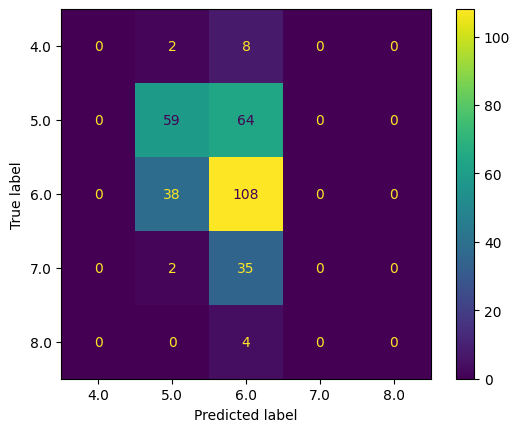

In [ ]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()



---


Plot Matriks Konfusi:

Memanggil metode plot() pada objek matriks konfusi (cm_display). Metode ini menghasilkan visualisasi matriks konfusi dalam bentuk plot.


---


Tampilkan Plot:

Memanggil fungsi show() dari matplotlib.pyplot untuk menampilkan plot matriks konfusi.


---



In [ ]:
import ssl

# Non-secure SSL certificate
ssl._create_default_https_context = ssl._create_unverified_context
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"



---


Import Library SSL:

Mengimpor modul SSL (ssl) yang digunakan untuk mengelola protokol keamanan dan sertifikat SSL.


---


Non-Secure SSL Certificate:

Baris pertama (ssl._create_default_https_context = ssl._create_unverified_context) digunakan untuk mengatur konteks SSL default agar tidak memverifikasi sertifikat SSL.
Ini dapat digunakan dalam situasi di mana sertifikat SSL tidak dapat diverifikasi atau di mana sertifikat SSL tidak dianggap sebagai kebutuhan yang kritis.


---


URL:

Mendefinisikan variabel url yang berisi lokasi URL dari dataset Iris pada UCI Machine Learning Repository yang disediakan melalui protokol HTTPS.


---



In [ ]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)



---


Mendefinisikan Nama Kolom:

names adalah sebuah list yang berisi nama-nama kolom untuk dataset. Kolom-kolom tersebut adalah 'sepal-length', 'sepal-width', 'petal-length', 'petal-width', dan 'class'.


---


Membaca Dataset dari URL:

pd.read_csv(url, names=names): Menggunakan fungsi read_csv dari pandas (pd) untuk membaca dataset dari URL yang telah diberikan.
url: Lokasi URL dari dataset Iris.
names=names: Menentukan nama kolom untuk dataset, sesuai dengan yang telah didefinisikan sebelumnya dalam variabel names.


---



In [ ]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



---


Mengonversi Dataset ke dalam Array:


array = dataset.values

Menggunakan metode values dari objek dataset untuk mengonversi dataset menjadi array NumPy. Setiap baris array akan mewakili satu entri dalam dataset, dan setiap kolom akan mewakili fitur atau label.


---


Pemisahan Fitur dan Label:


X = array[:, 0:4]

Y = array[:, 4]

Memisahkan fitur (X) dan label (Y) dari array. X akan berisi kolom 0 hingga 3 (indeks 0-3), sedangkan Y akan berisi kolom ke-4 (indeks 4).


---



Pembagian Data Menjadi Data Pelatihan dan Data Validasi:


validation_size = 0.20

seed = 7

X_train, X_validation, Y_train, Y_validation = model_selection.
train_test_split(X, Y, test_size=validation_size, random_state=seed)

* Menggunakan fungsi train_test_split dari modul model_selection untuk membagi dataset menjadi data pelatihan (X_train, Y_train) dan data validasi (X_validation, Y_validation).
* Parameter test_size menentukan persentase data yang akan dialokasikan untuk data validasi (dalam hal ini, 20%).
* random_state digunakan untuk memastikan hasil pembagian data dapat direproduksi dengan seed yang sama.


---



In [ ]:
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SGDC', SGDClassifier()))

results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

RFC: 0.966667 (0.040825)
DTC: 0.950000 (0.076376)
SGDC: 0.916667 (0.149071)


Kode tersebut membuat dan mengevaluasi tiga model klasifikasi berbeda (Random Forest Classifier, Decision Tree Classifier, dan Stochastic Gradient Descent Classifier) menggunakan validasi silang dengan 10 lipatan. Setiap model dinilai berdasarkan akurasi, dan hasilnya dicetak untuk dianalisis.

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
predictions = RFC.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



1. Membuat objek RandomForestClassifier sebagai model klasifikasi.
2. Melatih model menggunakan data pelatihan (X_train, Y_train) dengan metode fit.
3. Membuat prediksi pada dataset validasi (X_validation), dan hasilnya disimpan dalam variabel predictions.
4. Mencetak akurasi prediksi menggunakan accuracy_score.
5. Mencetak matriks konfusi menggunakan confusion_matrix.
6. Mencetak laporan klasifikasi yang mencakup metrik presisi, recall, dan F1-score untuk setiap kelas menggunakan classification_report.

>Kode ini bertujuan untuk memberikan pemahaman tentang seberapa baik model Random Forest Classifier berkinerja pada dataset validasi dan memberikan informasi terperinci tentang kinerja model untuk setiap kelas dalam bentuk laporan klasifikasi.